# 0 - Background Information

- Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

- Source

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations
Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

## Life Cycle of this project: 
1. Problem Statement
2. Data Collection
3. Data Preparation
4. Exploratory Data Analysis
5. Model Building
6. Model Validation and Testing
7. Model Deployment
8. Model Maintenance
9. Documentation and Reporting
10. Review and Iteration

# 1 - Problem Statement
- To detect early who is at high cardiovascular risk. 
- To train a model that can predict a possible heart disease based on 11 features.


# 2 - Data Collection

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations


Total: 1190 observations

Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

Kaggle Link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

## 2.1 - Import Libraries

In [88]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.impute import SimpleImputer

In [89]:
file_path = 'heart.csv'
heart = pd.read_csv(file_path)

In [90]:
# Display the first few rows of the DataFrame
print(heart.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


# 3 - Data Preparation

## 3.1 - Dataset Features Understanding

|No.| Attribute | Description |
|:--|:--|:--|
|1|Age|Age of the patient [years]|
|2|Sex|Sex of the patient [M: Male, F:Female]|
|3|ChestPainType|Chest Pain Type [[TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]| 
|4|RestingBP|Resting blood pressure [mm Hg]|
|5|Cholesterol|serum cholesterol [mm/dl]|
|6|FastingBS|fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]|
|7|RestingECG|resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]|
|8|MaxHR|maximum heart rate achieved [Numeric value between 60 and 202]|
|9|ExerciseAngina|exercise-induced angina [Y: Yes, N: No]|
|10|Oldpeak|oldpeak = ST [Numeric value measured in depression]|
|11|ST_Slope|the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]|
|12|HeartDisease|output class [1: heart disease, 0: Normal]|

In [94]:
heart.shape

(918, 12)

## 3.2 - Data Cleaning

Data Description: Understand what each of the 11 features represents and their expected data types (e.g., numerical, categorical, ordinal).

Target Variable: Confirm the target variable (e.g., Risk or HeartDisease) is correctly labeled and has clear class definitions (binary or multiclass).

In [96]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [97]:
# Check for missing values and if the features are in their expected data types
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [98]:
# Check if the numerical values have any outliers or weird numbers
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


RestingBP and Cholesterol has a min. value of 0. This is generally unrealistic and will be flagged as a potential error in our dataset.

Medical Context: 
- Cholesterol is the total cholesterol level in mg/dL. A value of 0 means no cholesterol, which is not biologically possible.
- Resting blood pressure is measured in mmHg and reflects the force of blood against artery walls when the heart is at rest. A value of 0 would indicate no blood pressure, which is impossible in a living person.

In [100]:
# Since there are 172 rows/samples that have the value '0' for the feature 'Cholesterol' 
# (this represents 18.73% of the dataset), we will impute the missing values using the median.

# Replace with NaN
heart[['Cholesterol', 'RestingBP']] = heart[['Cholesterol', 'RestingBP']].replace(0, np.nan)

# Impute missing values using the median 
imputer = SimpleImputer(strategy='median')
heart[['Cholesterol', 'RestingBP']] = imputer.fit_transform(heart[['Cholesterol', 'RestingBP']])

In [101]:
# Check that the categorical features only contain values that are correct 
list_of_features = ['Sex', 'ChestPainType', 'FastingBS',
       'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'HeartDisease']

for feature in list_of_features:
    print(heart[feature].value_counts(dropna=False))
    print('-----------------------------------------')

Sex
M    725
F    193
Name: count, dtype: int64
-----------------------------------------
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
-----------------------------------------
FastingBS
0    704
1    214
Name: count, dtype: int64
-----------------------------------------
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
-----------------------------------------
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
-----------------------------------------
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
-----------------------------------------
HeartDisease
1    508
0    410
Name: count, dtype: int64
-----------------------------------------


In [102]:
# Confirm that the changes have been made for the features - Cholesterol and RestingBP
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.538126,243.204793,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.990127,53.401297,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# 4 - Exploratory Data Analysis (EDA)

In [104]:
# Check distributions:
print(heart.describe())
print(heart.describe(include=['object']))

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.538126   243.204793    0.233115  136.809368   
std      9.432617   17.990127    53.401297    0.423046   25.460334   
min     28.000000   80.000000    85.000000    0.000000   60.000000   
25%     47.000000  120.000000   214.000000    0.000000  120.000000   
50%     54.000000  130.000000   237.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  
        Sex ChestPainType RestingECG ExerciseAngina ST_Slope
co

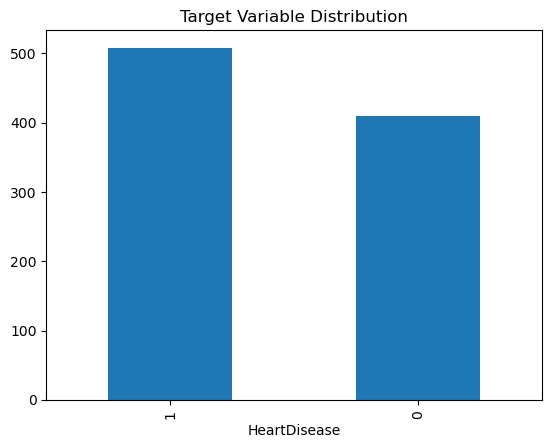

In [105]:
# Class Distribution 
heart['HeartDisease'].value_counts().plot(kind='bar', title='Target Variable Distribution')
plt.show()

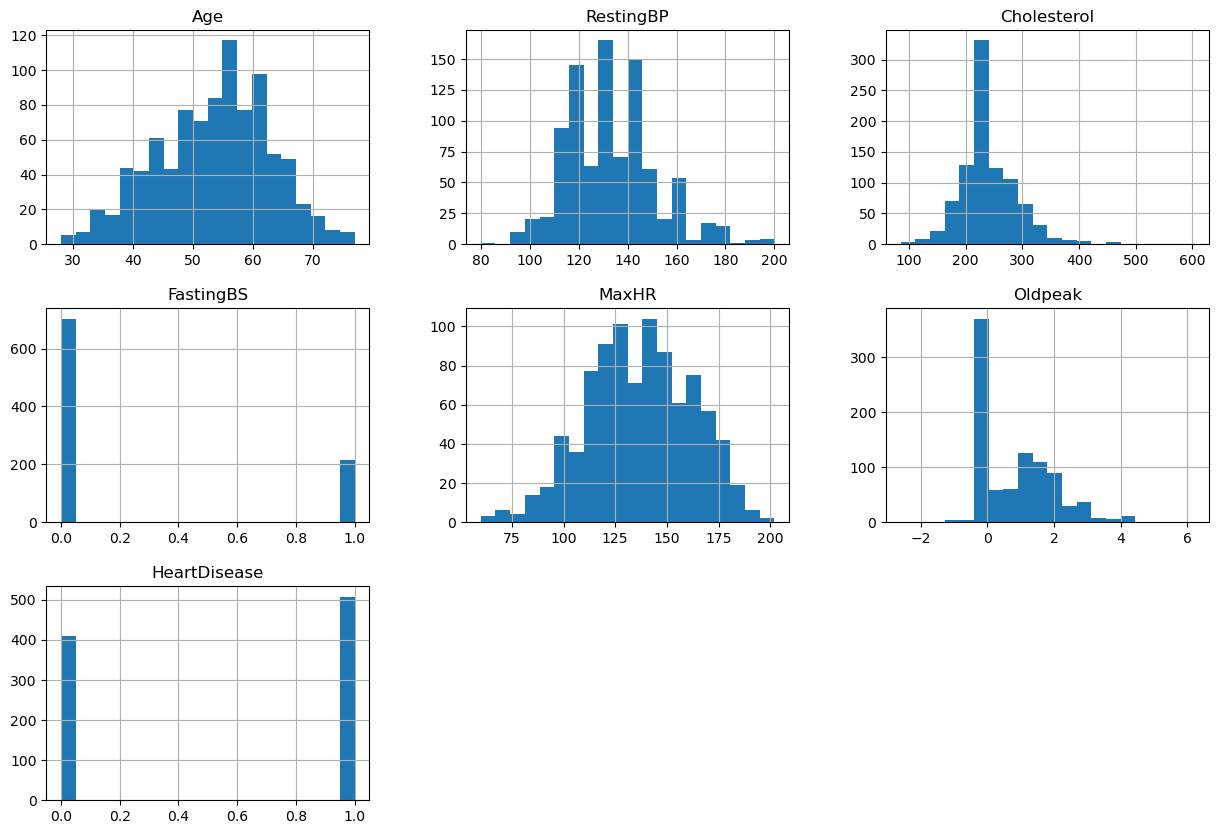

In [106]:
# Analyze the distributions of numerical features
heart.hist(bins=20, figsize=(15,10))
plt.show()

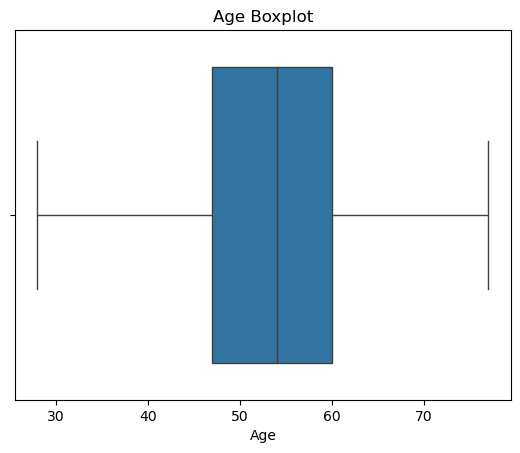

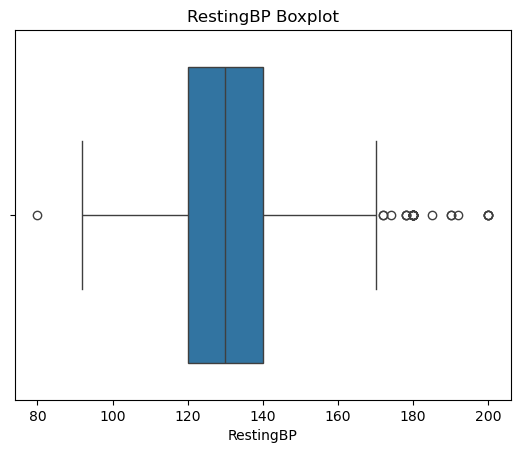

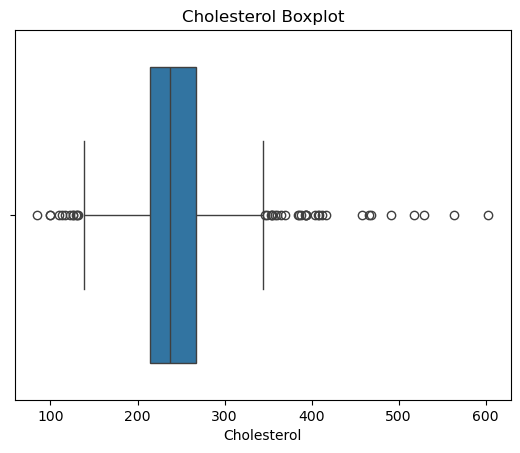

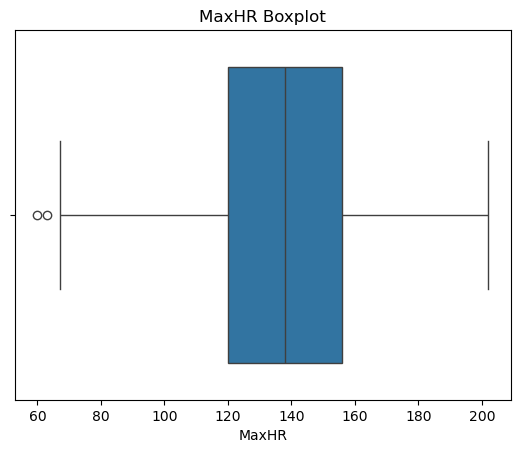

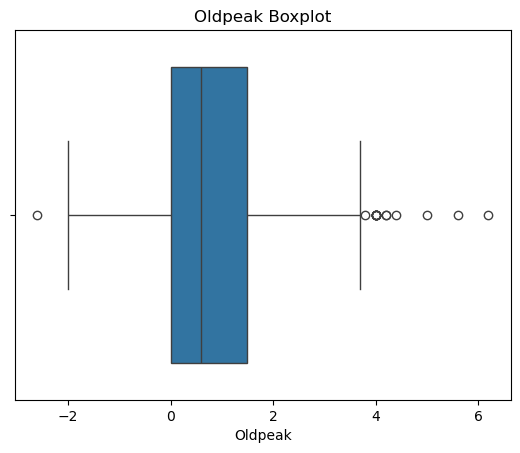

In [107]:
# Check for outliers using boxplots
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for feature in numerical_features:
    sns.boxplot(x=heart[feature])
    plt.title(f'{feature} Boxplot')
    plt.show()   

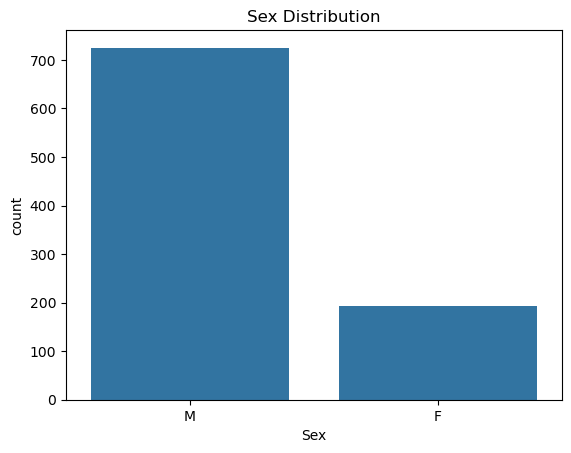

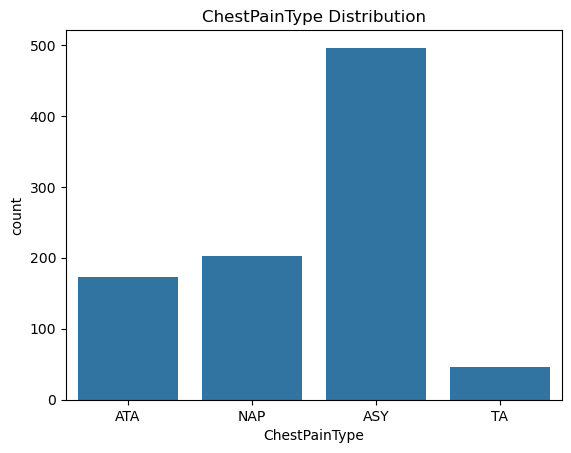

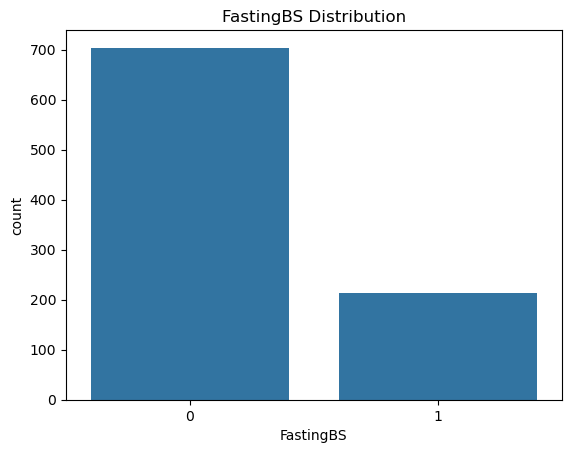

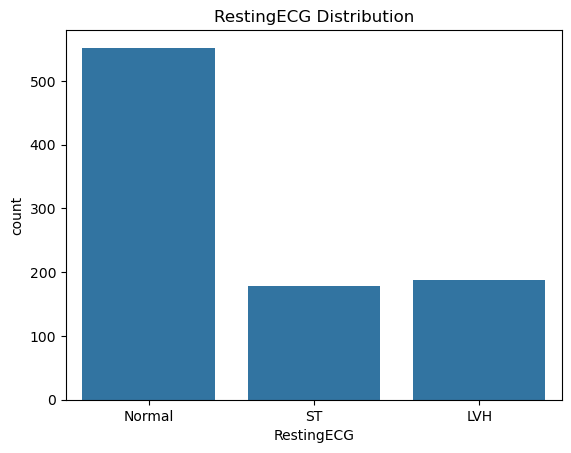

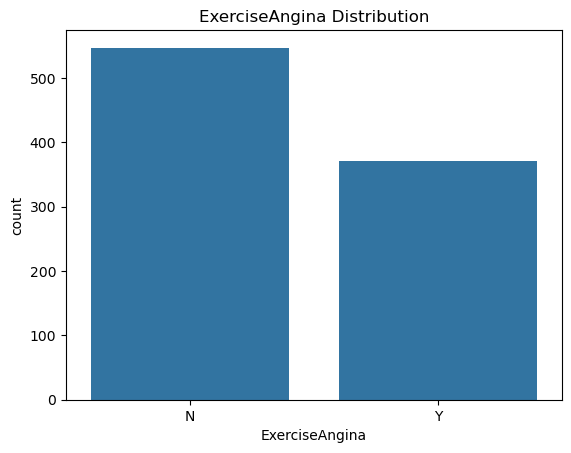

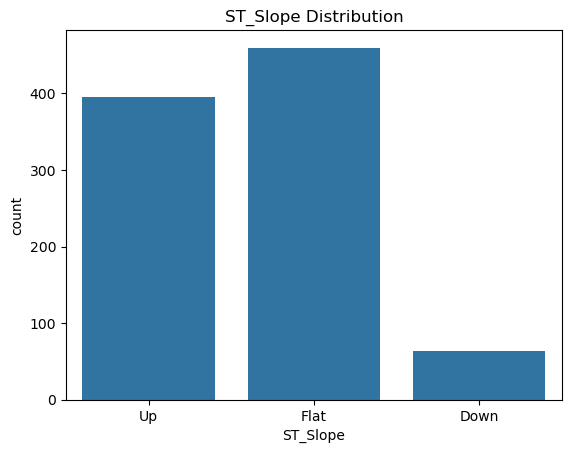

In [108]:
# Analyze the frequency of each category 
categorical_features = ['Sex', 'ChestPainType', 'FastingBS',
       'RestingECG', 'ExerciseAngina', 'ST_Slope']

for feature in categorical_features: 
    sns.countplot(x=heart[feature])
    plt.title(f'{feature} Distribution')
    plt.show()

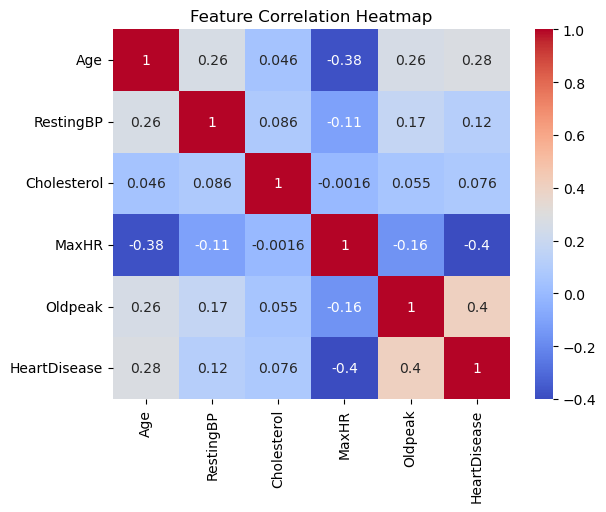

In [109]:
# Check relationships between numerical features using Correlation Heatmap
correlation_matrix = heart[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','HeartDisease']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

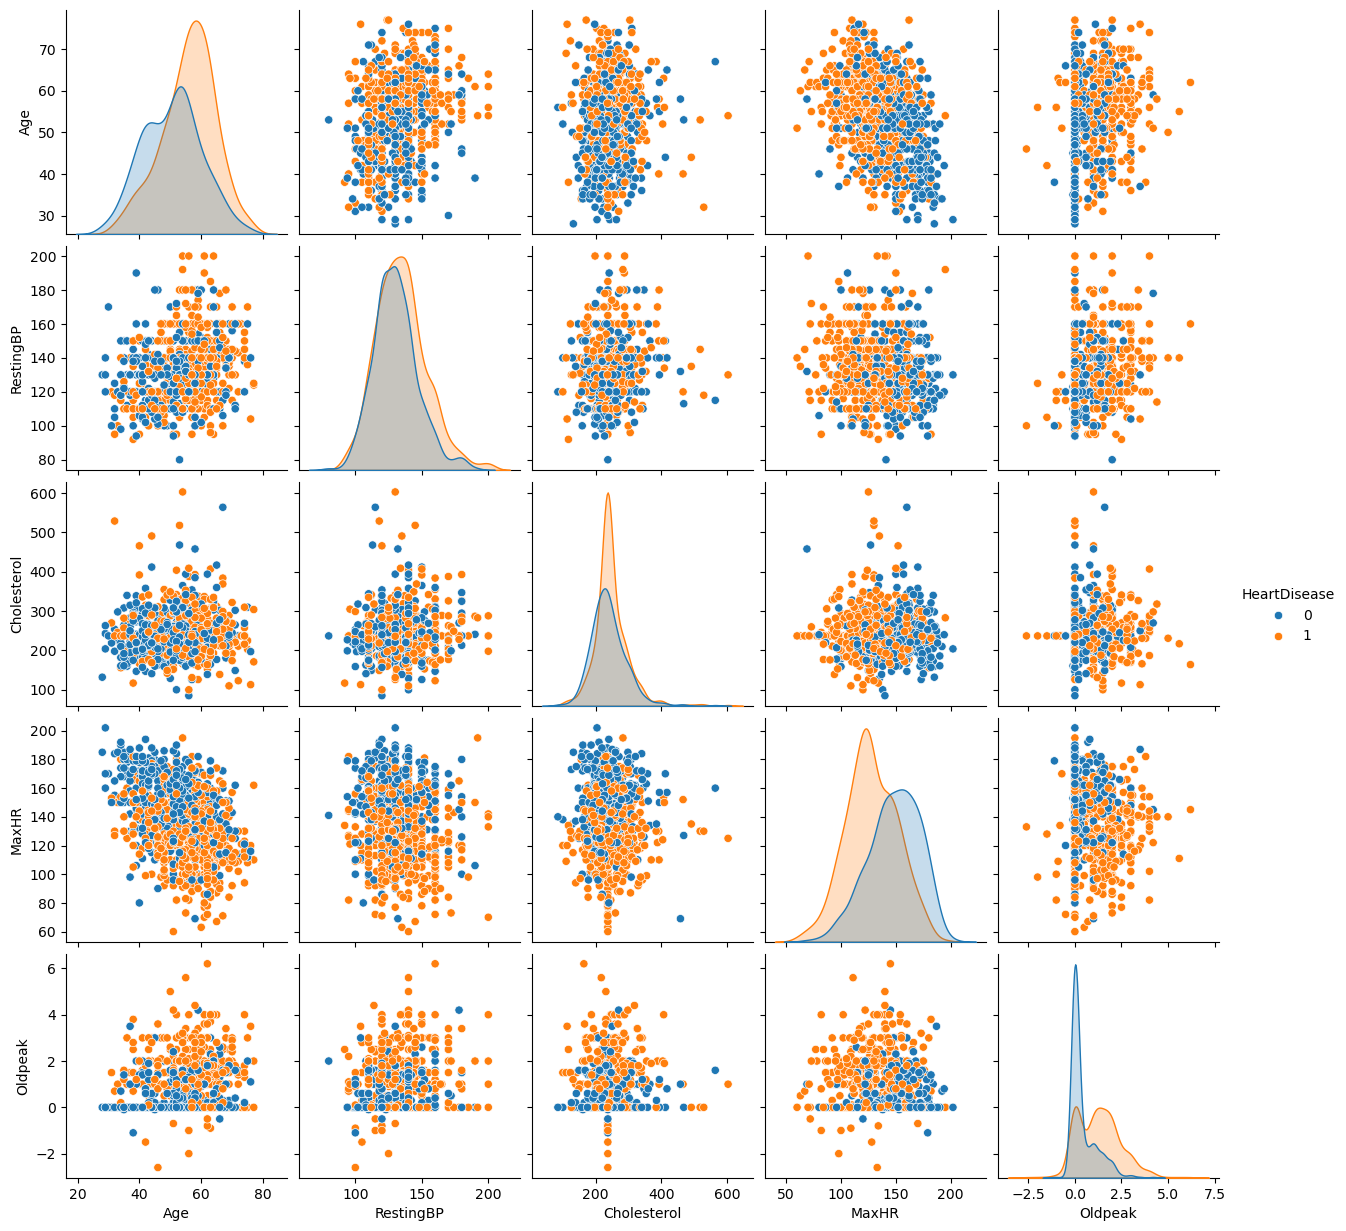

In [110]:
sns.pairplot(heart, hue='HeartDisease', vars=numerical_features)
plt.show()

In [111]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.538126,243.204793,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.990127,53.401297,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


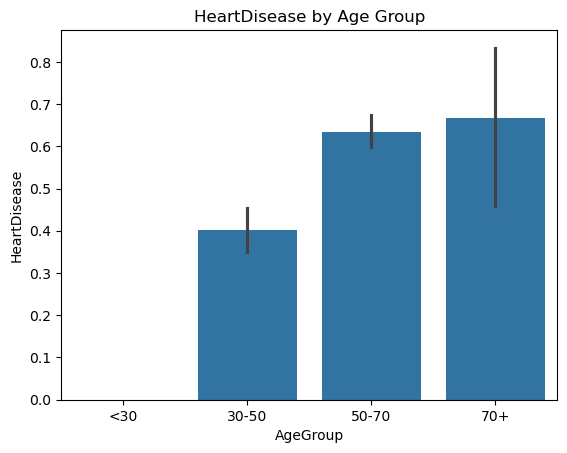

In [112]:
# Age groups: To analyze trends by age group 
heart['AgeGroup'] = pd.cut(heart.Age, bins=[0, 30, 50, 70, 100], labels=['<30', '30-50', '50-70', '70+'])
sns.barplot(x='AgeGroup', y='HeartDisease', data=heart)
plt.title('HeartDisease by Age Group')
plt.show()

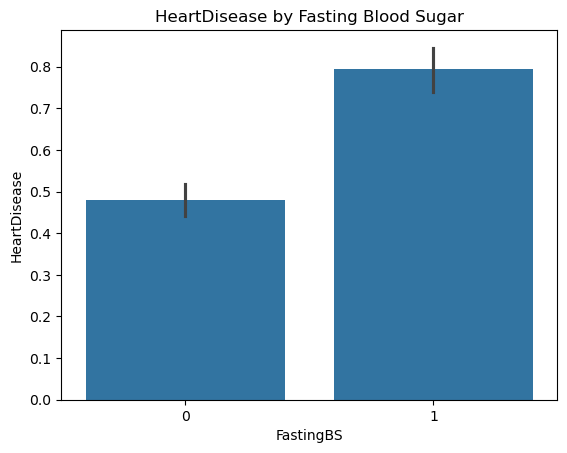

In [113]:
# Assess how FastingBS relates to HeartDisease since it's binary (0 or 1)
sns.barplot(x='FastingBS', y='HeartDisease', data=heart)
plt.title('HeartDisease by Fasting Blood Sugar')
plt.show()

# 5 - Model Building

In [115]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0,30-50
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1,30-50
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0,30-50
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1,30-50
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0,50-70


## 5.1 - Data Preprocessing
- The pipeline handles both numeric and categorical features separately
- Numeric features are standardized using StandardScaler
- Categorical features are encoded using OneHotEncoder with drop='first' to avoid multicollinearity
- All preprocessing steps are combined into a single pipeline using ColumnTransformer

In [120]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [122]:
# Define our feature categories
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [124]:
# Numeric features pipeline
numeric_transformer = StandardScaler()

# Categorical features pipeline 
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Combine transformers 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


## 5.2 - Initial Model Training and Evaluation
The pipeline implements three different models:
1. Logistic Regression (good baseline and interpretability)
2. Random Forest (good for capturing non-linear relationships)
3. XGBoost (typically high performance for structured data)

Each model is evaluated using:
- 5-fold cross-validation
- Classification report (precision, recall, F1-score)
- Confusion matrix
- ROC curves with AUC scores

In [127]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

In [128]:
# Drop the feature AgeGroup 
heart = heart.drop('AgeGroup', axis=1)

In [129]:
# Separate features (X) and target (y)
X = heart.drop('HeartDisease', axis=1)
y = heart.HeartDisease

print(f'X has the shape of: {X.shape}')
print(f'y has the shape of: {y.shape}')

X has the shape of: (918, 11)
y has the shape of: (918,)


In [130]:
# Split the data (60% training set, 20% validation set, 20% test set)
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42, stratify=y_)

In [131]:
print(f'X_train shape is {X_train.shape}\n' 
    f'y_train shape is {y_train.shape}\n\n'
    f'X_cv shape is {X_cv.shape}\n'
    f'y_cv shape is {y_cv.shape}\n\n'
    f'X_test shape is {X_test.shape}\n'
    f'y_test shape is {y_test.shape}'
)

X_train shape is (550, 11)
y_train shape is (550,)

X_cv shape is (184, 11)
y_cv shape is (184,)

X_test shape is (184, 11)
y_test shape is (184,)


In [132]:
# Transform the training dataset
X_train_transformed = pipeline.fit_transform(X_train)

# Transform the cv dataset 
X_cv_transformed = pipeline.transform(X_cv)

### These are my baseline models: 
1. Logistic Regression
2. Random Forest Classifier
3. XGBoost Classifier

### These are my baseline metrics: 
1. Precision
2. Recall
3. F1 Score
4. Accuracy

### 1 - Logistic Regression 

In [135]:
# Fit the Logistic Regression model 
logistic = LogisticRegression()
logistic.fit(X_train_transformed, y_train)

# Make predictions on the validation set
y_pred_cv = logistic.predict(X_cv_transformed)

In [136]:
# Classification report 
print(classification_report(y_cv, y_pred_cv))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        82
           1       0.89      0.86      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



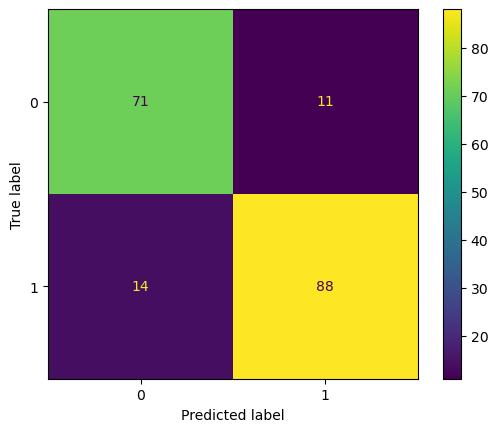

In [137]:
# Confusion Matrix 
ConfusionMatrixDisplay.from_estimator(logistic, X_cv_transformed, y_cv)
plt.show()

### 2 - Random Forest Classifier

In [139]:
# Fit the Random Forest Classifier 
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_transformed, y_train)

# Make predictions on the validation set 
y_pred_cv = random_forest.predict(X_cv_transformed)

In [140]:
# Classification report 
print(classification_report(y_cv, y_pred_cv))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        82
           1       0.90      0.91      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



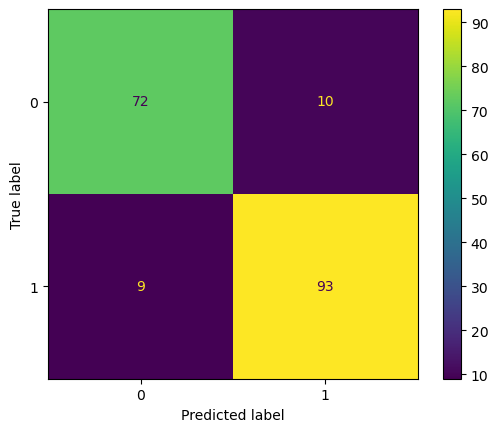

In [141]:
# Confusion Matrix 
ConfusionMatrixDisplay.from_estimator(random_forest, X_cv_transformed, y_cv)
plt.show()

### 3 - XGBoost

In [147]:
# Fit the XGBoost Classifier 
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_transformed, y_train)

# Make predictions on the validation set 
y_pred_cv = xgb_classifier.predict(X_cv_transformed)

In [150]:
# Classification report 
print(classification_report(y_cv, y_pred_cv))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        82
           1       0.90      0.85      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



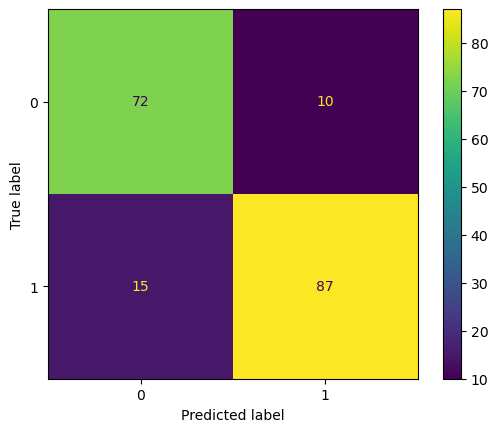

In [151]:
# Confusion Matrix 
ConfusionMatrixDisplay.from_estimator(xgb_classifier, X_cv_transformed, y_cv)
plt.show()

# 6 - Model Validation and Testing

### 6.3 - Logistic Regression Hyperparameter Tuning

In [173]:
# Create the pipeline 
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Define parameter grid
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'classifier__penalty': ['l1', 'l2'], # Regularization type 
    'classifier__solver': ['liblinear', 'saga'], # Solver algorithm
    'classifier__class_weight': ['balanced', None], # Class weights 
    'classifier__max_iter': [1000] # Maximum iterations 
}

# Create GridSearchCV object 
grid_search = GridSearchCV(
    estimator = lr_pipeline,
    param_grid = param_grid,
    cv=5, 
    scoring='f1',
    verbose=1
)

In [185]:
# Fit the grid search
grid_search.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


ValueError: 
All the 240 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\brann\anaconda3\Lib\site-packages\sklearn\utils\_indexing.py", line 338, in _get_column_indices
    all_columns = X.columns
                  ^^^^^^^^^
AttributeError: 'numpy.ndarray' object has no attribute 'columns'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\brann\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\brann\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\brann\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\brann\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\brann\anaconda3\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\brann\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\brann\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 313, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\brann\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\brann\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py", line 968, in fit_transform
    self._validate_column_callables(X)
  File "C:\Users\brann\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py", line 536, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\brann\anaconda3\Lib\site-packages\sklearn\utils\_indexing.py", line 340, in _get_column_indices
    raise ValueError(
ValueError: Specifying the columns using strings is only supported for dataframes.


### 6.2 - Random Forest Classifier Hyperparameter Tuning

### 6.3 - XGBoost Hyperparameter Tuning